In [60]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [61]:
pre_df = pd.read_csv('./data/dataset.csv').drop('Unnamed: 0', axis=1)
pre_df.shape

(112, 34)

In [62]:
pre_df.columns

Index(['School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'W.1', 'L.1', 'W.2',
       'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'Year', 'Round'],
      dtype='object')

In [63]:
df = pre_df.drop(['School', 'Round'], axis=1)

In [64]:
poly = PolynomialFeatures(2, interaction_only=True)

dfeng = poly.fit_transform(df)
cols = poly.get_feature_names(df.columns)
dfeng = pd.DataFrame(dfeng, columns=cols)

ix = (dfeng.std() == 0)
drop_cols = dfeng.columns[ix]
dfeng = dfeng.drop(drop_cols, axis=1)

C:\Users\alexanjs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


In [65]:
df = (dfeng - dfeng.mean())/dfeng.std()
df

,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,STL BLK,STL TOV,STL PF,STL Year,BLK TOV,BLK PF,BLK Year,TOV PF,TOV Year,PF Year
0,1.821932,1.974109,-1.540497,1.533557,2.200747,1.259387,0.481498,-0.856959,-0.286753,-0.276109,...,2.949186,3.805586,3.390630,-1.139144,1.507241,1.289564,-1.008789,1.591189,-1.355147,-1.266673
1,-1.189970,-0.206008,-0.518063,0.319025,0.533529,0.281359,0.481498,-0.856959,0.070095,0.276109,...,1.118820,-0.621330,-1.395523,-0.818485,2.432749,1.475211,0.072573,-0.767092,-0.619388,-0.806933
2,1.068956,1.429080,-1.284889,1.282815,1.243594,0.438382,0.481498,-0.856959,1.140639,-1.380546,...,0.581064,0.463015,0.858014,0.979063,0.317205,0.601857,0.694595,0.482724,0.806042,0.809360
3,-0.436995,0.702374,-1.284889,1.149608,1.319717,0.712050,0.481498,-0.856959,1.140639,-1.380546,...,-0.421056,-0.407879,-0.445025,-1.521146,-0.150021,-0.159703,-1.243244,0.125690,-1.646487,-1.498124
4,2.198420,1.974109,-1.284889,1.361171,1.157488,0.218550,0.481498,-0.856959,1.497487,-1.380546,...,1.095060,1.487875,0.583080,-0.037750,1.715240,1.055992,0.149129,1.665303,0.213484,-0.178960
5,-0.436995,-0.569361,0.504370,-0.511559,-0.075454,-0.131386,0.148610,0.142827,0.783791,-0.276109,...,0.361210,-0.924965,-1.080090,0.542224,1.102594,1.097684,1.871653,-0.508470,1.184620,0.887329
6,-0.060507,-0.751037,1.015587,-0.887672,-0.283857,0.382303,-1.182939,1.475874,-0.286753,0.828327,...,0.759675,-0.801082,-1.263128,0.513411,1.256094,0.850012,1.822609,-1.251861,0.876271,0.402653
7,1.068956,-0.751037,1.782412,-1.255949,-0.549663,0.777103,-2.181601,1.809136,0.070095,1.380546,...,1.152441,1.153952,-0.103543,0.570107,2.031335,0.965104,1.017568,0.941658,1.128656,0.284644
8,-1.189970,-0.206008,-0.518063,0.319025,0.491100,0.315007,0.148610,-0.523697,0.070095,1.380546,...,-0.241483,0.587887,-0.439858,-0.396516,0.039448,-0.578015,-0.483659,0.052994,-0.241907,-0.565648
9,-1.189970,-0.206008,-0.518063,0.319025,-0.185271,0.279116,-0.184277,-0.190435,0.070095,0.276109,...,0.875462,-0.464158,-0.394435,-0.865887,0.646681,0.817760,-0.507583,-0.981336,-0.994674,-0.914404



PC-1      4.317903e-01
PC-2      1.439012e-01
PC-3      9.139441e-02
PC-4      6.500271e-02
PC-5      5.279762e-02
PC-6      3.638280e-02
PC-7      2.598481e-02
PC-8      2.231536e-02
PC-9      1.778915e-02
PC-10     1.582637e-02
PC-11     1.399687e-02
PC-12     1.332128e-02
PC-13     1.137117e-02
PC-14     7.759279e-03
PC-15     6.216213e-03
PC-16     5.961112e-03
PC-17     5.351419e-03
PC-18     3.981338e-03
PC-19     3.759156e-03
PC-20     3.408985e-03
PC-21     3.041540e-03
PC-22     2.488906e-03
PC-23     2.335458e-03
PC-24     2.170313e-03
PC-25     1.595952e-03
PC-26     1.348027e-03
PC-27     1.250179e-03
PC-28     7.774914e-04
PC-29     6.540333e-04
PC-30     6.085783e-04
              ...     
PC-83     1.179779e-05
PC-84     1.142318e-05
PC-85     1.000464e-05
PC-86     9.826302e-06
PC-87     9.498312e-06
PC-88     8.673907e-06
PC-89     8.361866e-06
PC-90     8.077808e-06
PC-91     7.812369e-06
PC-92     6.969201e-06
PC-93     6.235986e-06
PC-94     6.135518e-06
PC-95     

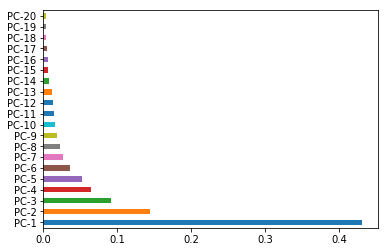

In [66]:
n_components = df.shape[0]
print()
col = ['PC-'+str(i+1) for i in range(n_components)]
pca = PCA(n_components = n_components)
pca.fit(df)
PVE = pd.Series(pca.explained_variance_ratio_, index=col)
print(PVE)
PVE.sort_values(ascending=False)[:20].plot.barh()

In [67]:
df_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=col)
print(df_loadings.shape)
df_loadings.round(2)

(112, 528)


,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,STL BLK,STL TOV,STL PF,STL Year,BLK TOV,BLK PF,BLK Year,TOV PF,TOV Year,PF Year
PC-1,0.05,0.06,-0.06,0.06,0.06,0.03,0.05,-0.05,0.04,-0.04,...,0.05,0.04,0.04,0.01,0.04,0.04,0.02,0.03,0.01,0.01
PC-2,0.04,-0.02,0.06,-0.04,0.01,0.05,-0.07,0.07,0.00,0.04,...,0.02,0.01,0.01,0.03,0.02,0.03,0.03,0.03,0.04,0.04
PC-3,-0.03,-0.02,0.01,-0.01,-0.00,0.01,-0.03,0.01,-0.03,-0.00,...,0.01,0.07,0.03,-0.12,0.02,-0.01,-0.11,0.07,-0.12,-0.12
PC-4,0.03,0.00,0.01,-0.01,-0.06,-0.10,0.03,-0.01,-0.04,0.03,...,-0.03,0.03,0.05,0.03,-0.06,-0.05,-0.01,0.01,0.02,0.02
PC-5,0.00,-0.01,0.02,-0.02,-0.04,-0.03,0.01,-0.00,-0.06,0.09,...,0.05,0.04,0.02,0.03,0.07,0.05,0.04,0.04,0.04,0.03
PC-6,-0.02,-0.01,-0.01,0.00,0.06,0.09,-0.00,0.01,-0.07,0.07,...,-0.05,-0.03,-0.02,-0.01,-0.07,-0.07,-0.04,-0.06,-0.02,-0.01
PC-7,0.06,0.03,0.00,0.01,0.01,-0.01,0.02,-0.01,0.06,0.01,...,0.02,-0.06,-0.09,0.05,0.05,0.04,0.08,-0.09,0.06,0.05
PC-8,-0.03,-0.00,-0.02,0.01,0.01,-0.03,-0.03,-0.00,0.03,0.02,...,0.09,0.07,0.04,-0.03,0.06,0.03,-0.03,-0.04,-0.06,-0.07
PC-9,-0.05,-0.02,-0.00,-0.02,0.00,0.00,-0.02,0.02,-0.03,0.01,...,0.11,0.01,0.02,0.01,0.08,0.09,0.06,-0.05,-0.01,-0.00
PC-10,0.01,-0.01,0.03,-0.02,-0.01,0.04,0.05,-0.05,-0.15,-0.04,...,0.02,-0.04,-0.04,-0.05,0.07,0.08,0.00,0.04,-0.02,-0.01


In [68]:
df_scores = pd.DataFrame(pca.transform(df), columns=col)
df_scores.shape

(112, 112)

In [69]:
output_table = df_scores.drop(df_scores.columns[20:], axis=1)
output_table['Year'] = pre_df['Year']
output_table['Round'] = pre_df['Round']
output_table['School'] = pre_df['School']

In [70]:
output_table.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,Year,Round,School
0,44.488013,13.451983,17.215303,15.516061,-1.392000,10.322120,-0.833705,5.512971,9.932289,0.306404,...,-1.952358,1.265309,2.922808,-0.524872,1.021296,-0.708134,-0.519683,1,0,Duke
1,2.141548,-8.058277,5.556478,-10.172859,9.089618,1.121069,7.020399,1.294642,5.613959,1.230927,...,-1.255755,-2.200641,-0.754523,0.183981,1.142544,-1.451628,0.074957,4,0,Connecticut
2,22.148220,3.858848,-4.308118,2.385105,-7.294075,-3.227119,-2.024828,-1.642130,1.684555,-0.747842,...,-0.422080,-0.253577,0.585204,0.350586,-1.001076,-1.680653,1.665078,10,0,Duke
3,8.911110,-11.482865,9.480825,-10.883555,-1.270769,1.009218,2.371393,-1.351887,-4.145126,-2.918149,...,0.485580,-1.087791,-2.293007,1.356170,1.099706,-1.668532,0.767453,0,0,Michigan State
4,28.242471,5.259683,10.714157,3.375753,-5.324363,-6.114989,6.478768,-4.972679,2.294216,-2.136309,...,1.349417,2.037605,2.970757,-3.331529,-3.134163,-2.338882,-0.178971,6,0,Florida


In [71]:
output_table.to_csv('./data/PCA_Output.csv')

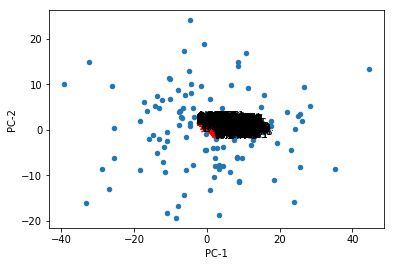

In [72]:
df_scores.plot.scatter(x='PC-1', y='PC-2')
x_scale = df_scores['PC-1'].abs().max()
y_scale = df_scores['PC-2'].abs().max()

for i in range(df.shape[1]):
    x = x_scale*df_loadings.iloc[0,i]
    y = y_scale*df_loadings.iloc[1,i]
    plt.arrow(0, 0, x, y, head_width=.2, color='red')
    x = 1.2*x
    y = 1.2*y
    plt.text(x,y,df.columns[i], color='black')
